In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
# Read in the insurance dataset
df = pd.read_excel("/content/AgencyDataset.xlsx")

In [ ]:
# Check out the  dataset
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


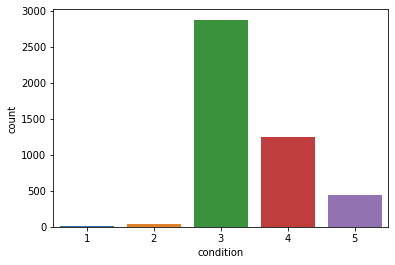

In [ ]:
sns.countplot(data=df,x=df['condition'])

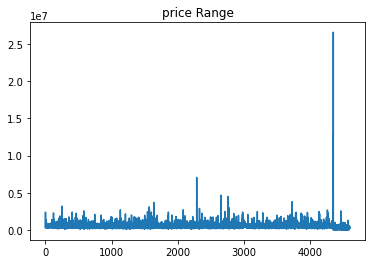

In [ ]:
df['price'].plot(title='price Range')

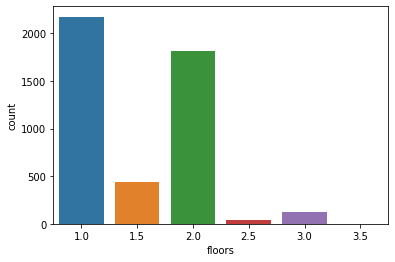

In [ ]:
sns.countplot(data=df,x=df['floors'])

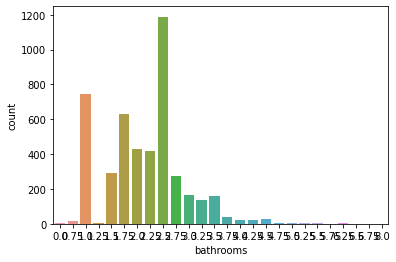

In [ ]:
sns.countplot(data=df,x=df['bathrooms'])


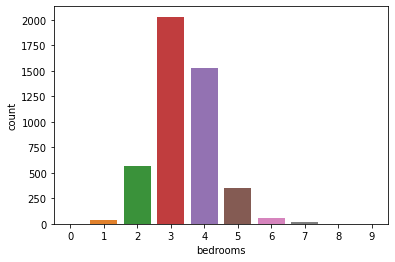

In [ ]:
sns.countplot(data=df,x=df['bedrooms'])

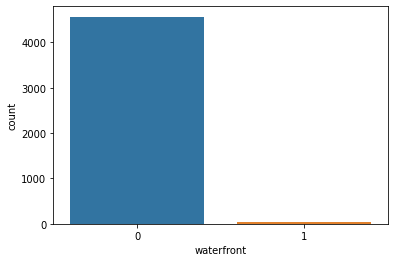

In [ ]:
sns.countplot(data=df,x=df['waterfront'])

In [ ]:
#check duplicated values
df.duplicated(keep=False).sum()

0

In [ ]:
#check null values
df.isnull().values.any()

False

In [ ]:
#chech zeros in price
(df["price"]==0).sum()

49

In [ ]:
#replace zeros with mean value
df['price'] = df['price'].replace(0, np.nan)
df['price'].isna().sum()

49

In [ ]:
df=df.fillna(df['price'].mean())


In [ ]:
df['price'].isna().sum()

0

price                AxesSubplot(0.125,0.71587;0.168478x0.16413)
bedrooms          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
bathrooms         AxesSubplot(0.529348,0.71587;0.168478x0.16413)
sqft_living       AxesSubplot(0.731522,0.71587;0.168478x0.16413)
sqft_lot            AxesSubplot(0.125,0.518913;0.168478x0.16413)
floors           AxesSubplot(0.327174,0.518913;0.168478x0.16413)
sqft_above       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
sqft_basement    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
yr_built            AxesSubplot(0.125,0.321957;0.168478x0.16413)
yr_renovated     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

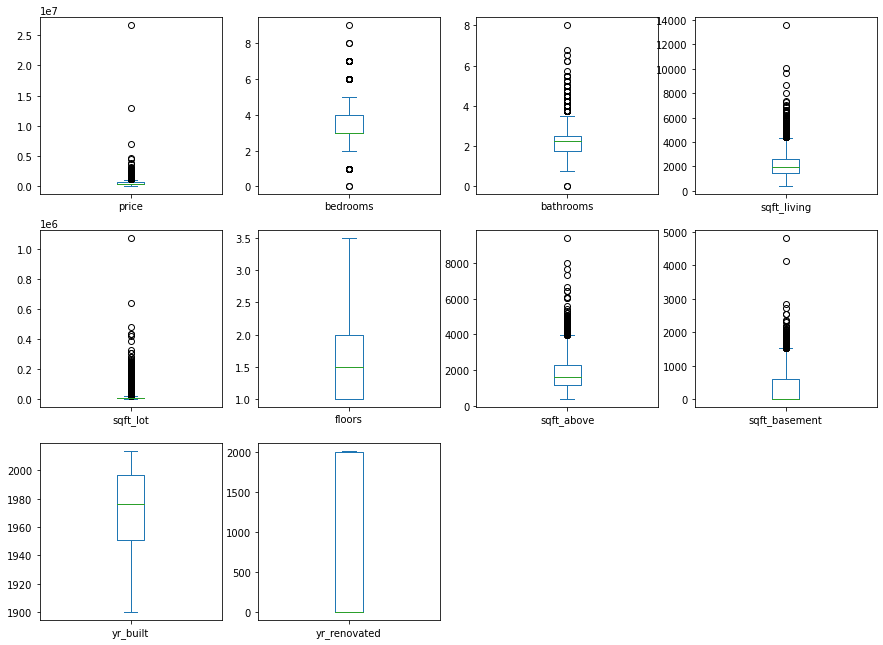

In [ ]:
df.drop(columns=["view","waterfront","condition"]).plot(kind="box", subplots=True, layout=(4,4), figsize=(15,15))

**Even though the graph above detected the existence of outliers we decided to keep them since they represent natural variations in the population and we call them true outliers** 

In [ ]:
df["ratio"]=df["price"]/(df["sqft_lot"]*df["floors"]+df["sqft_basement"])
df


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,ratio
0,2014-05-02,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,26.373441
1,2014-05-02,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,129.706202
2,2014-05-02,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,28.626433
3,2014-05-02,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,46.511628
4,2014-05-02,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,48.672566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,48.453878
4596,2014-07-09,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,35.278841
4597,2014-07-09,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,29.719430
4598,2014-07-10,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,26.588235


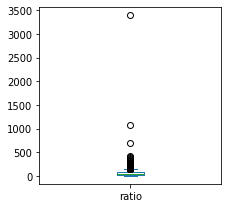

In [ ]:
df['ratio'].plot(kind="box", subplots=True, layout=(4,4), figsize=(15,15))

fig = px.histogram(df, x="ratio", marginal="box")
fig.show()

In [ ]:
# delete all rows with column 'bmi' has value greater then 46.09 (the upper fence)
indexx = df[ (df['ratio'] >= 145.833) ].index
df.drop(indexx , inplace=True)

In [ ]:
# def outlier_treatment(datacolumn):
#   sorted(datacolumn)
#   Q1,Q3 = np.percentile(datacolumn , [10,90])
#   IQR = Q3 -Q1
#   lower_range = Q1 - (1.5 * IQR)
#   upper_range = Q3 + (1.5 * IQR)
#   return lower_range,upper_range

In [ ]:
# for i in set(df['city'].values):
#   lower_range,upper_range=outlier_treatment(df[df['city']==i]['ratio'])
#   print(lower_range,upper_range)
#   indexbmi = df[ ((df['ratio'] > upper_range) | (df['ratio']<lower_range) & ( df['city']==i)) ].index
#   print(len(indexbmi))
  
#   df.drop(indexbmi , inplace=True)

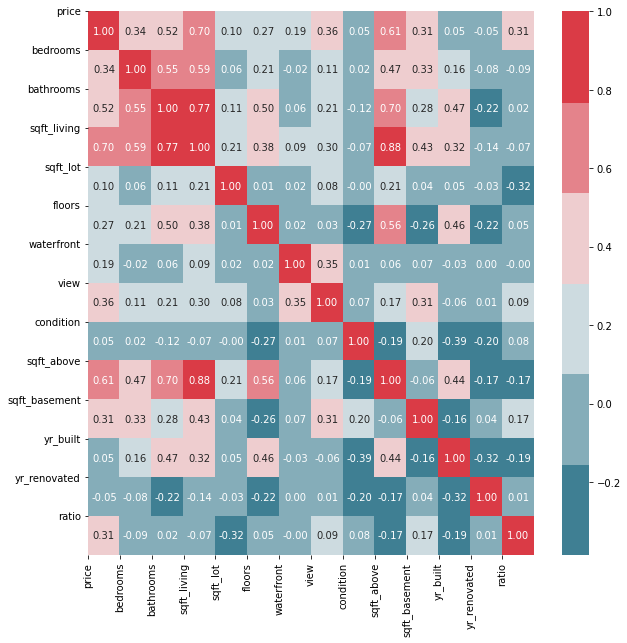

In [ ]:

#Create Correlation matrix
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,10))
#Generate Color Map
colormap = sns.diverging_palette(220, 10) #220 color tint + 10 saturation
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr,  cmap=colormap,annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)))
#Apply yticks
plt.yticks(range(len(corr.columns)))
#show plot

plt.show()

**After oberving the correlation matrix we noticed that correlation coefficient between the sqft_living and sqaft_above is 0.88 which is higher then 0.7 so we decided to drop the feature of sqft_living**

In [ ]:
df=df.drop(columns=["sqft_living"])

**the statezip best describe the location of the house so we dropped the ones bellow**

In [ ]:
df=df.drop(columns=["street","country","city","date"])

In [ ]:
df = pd.get_dummies(df,columns=["statezip"])
df

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,3.130000e+05,3,1.50,7912,1.5,0,0,3,1340,0,...,0,0,0,0,0,0,0,0,0,0
1,2.384000e+06,5,2.50,9050,2.0,0,4,5,3370,280,...,0,0,0,0,0,0,0,0,0,0
2,3.420000e+05,3,2.00,11947,1.0,0,0,4,1930,0,...,0,0,0,0,0,0,0,0,0,0
3,4.200000e+05,3,2.25,8030,1.0,0,0,4,1000,1000,...,0,0,0,0,0,0,0,0,0,0
4,5.500000e+05,4,2.50,10500,1.0,0,0,4,1140,800,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,6360,1.0,0,0,4,1510,0,...,0,0,0,0,0,0,0,0,0,0
4596,5.343333e+05,3,2.50,7573,2.0,0,0,3,1460,0,...,0,0,0,0,0,0,0,0,0,0
4597,4.169042e+05,3,2.50,7014,2.0,0,0,3,3010,0,...,0,0,0,0,0,0,0,0,0,0
4598,2.034000e+05,4,2.00,6630,1.0,0,0,3,1070,1020,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
y=df["price"].values
x=df.drop(columns=["price"]).values
y


array([ 313000.      , 2384000.      ,  342000.      , ...,
        416904.166667,  203400.      ,  220600.      ])

In [ ]:
# Fitting Logistic Regression to the Training set

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,\
precision_score 
# from sklearn.decomposition import PCA

In [ ]:
# pca=PCA(n_components=1)
# x_pca = pca.fit_transform(x)
# print(pca.explained_variance_ratio_)#out:[0.99859308, 7.64*10^-4]: meaning that PC1 contains 99% of the variance of the dataset
# print(np.abs(pca.components_[0])) # we notice that the third feature(sqft_lot) has the highset eigenvalue/variance(0.99)
# print(len(x_pca))

In [ ]:
# df1 = pd.DataFrame(data =x_pca, columns = ['PC1'])
# print(df1)
# df1['price']=y
# df1
# df1 = df.filter(items=["sqft_lot", "price"])
# print(df1)
# X_train = X_train[:,2].reshape(-1,1)
# print(len(X_train))
# print(y_test)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print()

In [ ]:
#normalization
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train,y_train

(array([[0.33333333, 0.28125   , 0.03773156, ..., 0.        , 0.        ,
         0.        ],
        [0.33333333, 0.125     , 0.00721744, ..., 0.        , 0.        ,
         0.        ],
        [0.33333333, 0.125     , 0.00847702, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.44444444, 0.40625   , 0.01312127, ..., 0.        , 0.        ,
         0.        ],
        [0.33333333, 0.3125    , 0.0063007 , ..., 0.        , 0.        ,
         0.        ],
        [0.33333333, 0.28125   , 0.00605941, ..., 0.        , 0.        ,
         0.        ]]),
 array([658588., 299900., 310000., ..., 600000., 600000., 588000.]))

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.coef_)
print(regr.score(X_test, y_test))

[-1.93802241e+05  1.21328554e+05  4.50810316e+05 -4.28069916e+04
  5.35468678e+05  1.75600554e+05  1.12568890e+05  2.26792233e+06
  5.84350296e+05 -1.24010838e+05  9.72290311e+03  3.92086309e+05
 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17
 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17
 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17
 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17
 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17
 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17
 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17
 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17
 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17
 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17
 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17
 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17 -1.82537795e+17
 -1.82537795e+17 -1.82537